In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
infile = '../data/simulation_shared_with_bjoern.csv'
outfile = '../data/simulation_gaussian_gfp.csv'
data_in = pd.read_csv(infile)


In [4]:
var_g = 5000
noise = np.random.normal(0, np.sqrt(var_g), len(data_in.gfp_no_noise))
data_in['gfp_gaussian_noise'] = data_in.gfp_no_noise + noise 



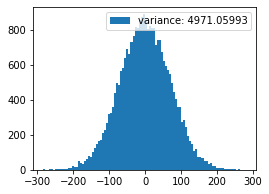

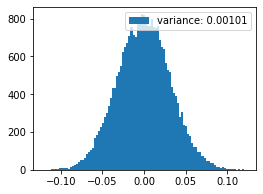

In [5]:
def plot_dist(dat):
    fig, ax = plt.subplots(figsize=(4,3))
    label = "variance: {:.5f}".format(np.var(dat))
    ax.hist( dat, bins=100, label=label)
    plt.legend()
    plt.show()

plot_dist(data_in.gfp_gaussian_noise - data_in.gfp_no_noise)
plot_dist(data_in.log_leng_noise - data_in.log_leng_no_noise)


In [6]:
data_in.to_csv(outfile)

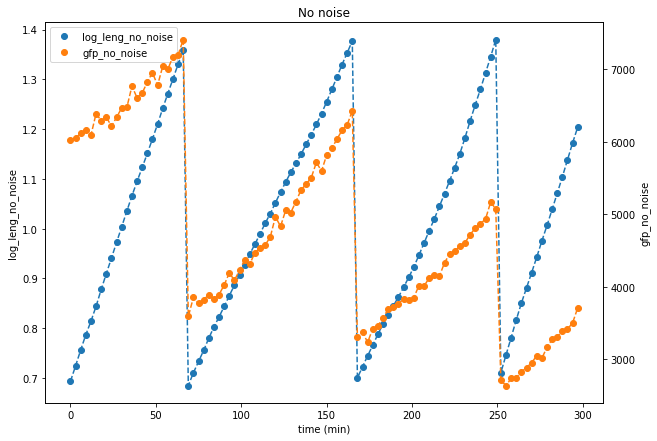

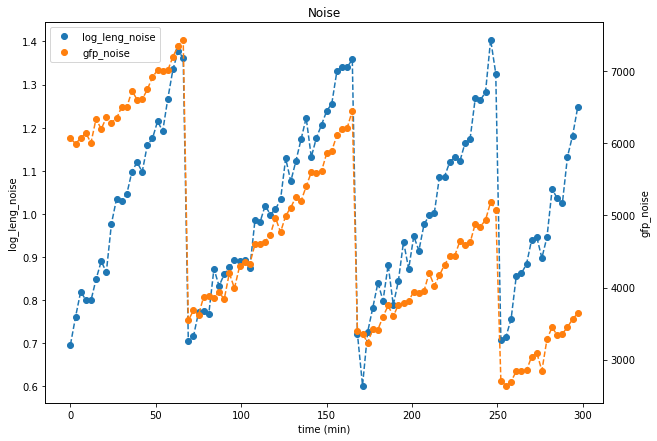

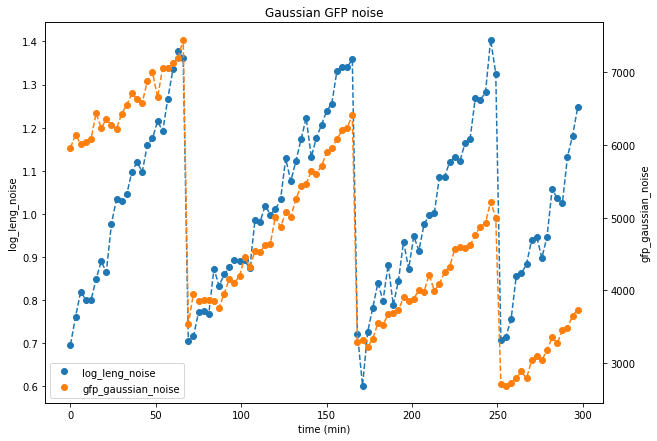

In [7]:
def plot_time_series(data, cols, title=None, n=200):
    cmap = plt.cm.tab10

    fig, ax = plt.subplots(figsize=(10,7))
    ax2 = ax.twinx()
    if title !=None:
        plt.title(title)

    time = data['time_min'][:n]
    plots = []
    for i, col in enumerate(cols):
        d = data_in[col][:n]
        if i%2==0:
            axes = ax
        else:
           axes = ax2
        plots.append(axes.plot(time, d, 'o', c=cmap(i), label=col)[0])
        axes.plot(time, d, '--', c=cmap(i))
        axes.set_ylabel(col)

    ax.set_xlabel('time (min)')

    ax.legend(plots, [l.get_label() for l in plots])
    plt.show()
    

plot_time_series(data_in, ['log_leng_no_noise', 'gfp_no_noise'], 'No noise', n=100)
plot_time_series(data_in, ['log_leng_noise', 'gfp_noise'], 'Noise', n=100)
plot_time_series(data_in, ['log_leng_noise' ,'gfp_gaussian_noise'], 'Gaussian GFP noise', n=100)

# Correct Cell Tree

In [27]:
from copy import deepcopy
infile = '../data/simulation_gaussian_gfp.csv'
data_in = pd.read_csv(infile)

data_in['parent_id'] = np.where(data_in["id"] == 0, -1, data_in["parent_id"])
data_in.to_csv(infile)


In [26]:
data_in.loc[data_in["id"] != 0]

,Unnamed: 0,Unnamed: 0.1,leng,lane_ID,parent_id,id,gfp,leng_no_noise,growth_rate,q_dyn,time_sec,cell,gfp_no_noise,gfp_noise,log_leng_no_noise,log_leng_noise,time_min,gfp_gaussian_noise
23,23,69,1.903986,0,0.0,1.0,3591.247488,1.982973,0.009139,8.662327,4140,1.0,3591.247488,3543.500159,0.684597,0.703819,69.0,3534.821941
24,24,72,2.026624,0,0.0,1.0,3855.975602,2.034859,0.008424,9.121826,4320,1.0,3855.975602,3680.915645,0.710426,0.715550,72.0,3957.302806
25,25,75,2.222357,0,0.0,1.0,3774.407500,2.081123,0.006724,8.965147,4500,1.0,3774.407500,3622.757176,0.732908,0.771302,75.0,3857.478132
26,26,78,2.262382,0,0.0,1.0,3823.279911,2.128365,0.007911,9.067603,4680,1.0,3823.279911,3872.116903,0.755354,0.774276,78.0,3863.852967
27,27,81,2.141735,0,0.0,1.0,3890.606174,2.181212,0.008213,8.816550,4860,1.0,3890.606174,3875.688273,0.779881,0.768217,81.0,3872.617314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26547,26547,79641,3.649301,7,141.0,142.0,3015.567713,3.528018,0.009235,11.465179,4778460,7142.0,3015.567713,3052.091931,1.260736,1.260196,79641.0,2931.234983
26548,26548,79644,3.596819,7,141.0,142.0,3217.714223,3.626245,0.009007,11.204321,4778640,7142.0,3217.714223,3198.313431,1.288198,1.284785,79644.0,3143.926484
26549,26549,79647,3.900245,7,141.0,142.0,3261.400461,3.728561,0.009383,10.703994,4778820,7142.0,3261.400461,3283.019766,1.316022,1.333983,79647.0,3271.394298
26550,26550,79650,3.482273,7,141.0,142.0,3347.730685,3.836894,0.009603,10.463954,4779000,7142.0,3347.730685,3333.664322,1.344663,1.317801,79650.0,3509.207396
